<h1 style="font-size: 200%;color: darkgreen; font-weight: bold; text-align:center">Numerical Simulation Laboratory 2021</h1>

<p style="text-align:center"><b>Author:</b> Giacomo Riccardo Hvaring<br>

---

# 6. One-dimensional Ising model

In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking only the values $\{-1,1\}$, $J>0$ (ferromagnetic model), and with the assumption $s_{N+1} = s_{1}$, and units such that $\mu_B=1$ and $k_B=1$ are assumed.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_B T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

### internal energy per spin (with $h=0$)

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \cdots
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

### heat capacity (with $h=0$)

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \cdots =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

... per spin:

$$
\frac{C(N,T)}{N} = \cdots =
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

### magnetization (with $h \not= 0$)

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = \cdots = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:

$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1} \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1} \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

### magnetic susceptibility (with $h=0$)

$$
\chi(N,T) = \frac{\partial M}{\partial h} = \cdots
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

In [1]:
from libsim import *                        # module containing some handy functions for the labs

results_directory += "lab_06/"              # where to look for the data
HTML(custom_css())   

In [2]:
# analytical results 

from numpy import sinh, cosh, tanh, sqrt, exp

J = 1.0
nspins = 50

points=100
T = np.linspace(0.1, 3, points)

beta = 1/T
th = tanh(J/T)
thN= th ** nspins
cth = 1/th

# internal energy (h = 0)
energy = -J * ( th + cth * thN ) / ( 1 + thN )

# heat capacity (h = 0)
energy2 = (1 + thN + (nspins-1) * (th**2) + (nspins-1) * (cth**2) * thN ) / (1 + thN)
energy2 *= J**2
heat_capacity = (beta**2) * (energy2 - nspins * energy**2)

# magnetization (h != 0)
h = 0.02
bJ, bh = beta*J, beta*h
l0 = exp(bJ) * cosh(bh) 
delta = sqrt(exp(2*bJ) * cosh(bh)**2 - 2*sinh(2*bJ))
l1, l2 = l0 + delta, l0 - delta
Z = l1**nspins + l2**nspins
fraction = exp(bJ) * cosh(bh) / sqrt( (exp(bJ)*cosh(bh))**2 - 2*sinh(2*bJ) )
magnetization = exp(bJ) * sinh(bh) / Z * ( l1**(nspins-1) * (1 + fraction) + l2**(nspins-1) * (1 - fraction) )

# susceptibility (h = 0)
susceptibility = beta * exp( 2*bJ ) * ( 1 - thN ) / ( 1 + thN )

## Exercise 6.1

Complete the C++ code to simulate 1D Ising model with the two algorithms discussed in the lecture (Metropolis and Gibbs) and use them to sample Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

Compute the following quantities:

1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as functions of the temperature of the system $T$ in the range $\left[0.5, 2\right]$, for a system of $N=50$ spins with $J=1$.

As usual, use data blocking to calculate the averages and estimate their statistical uncertainties.

<p class="assignement"> Plot your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ with their statistical uncertainties, obtained with a large number of <i>MC steps</i> (e.g. $M\ge 10^5$) compared with the curves calculated analytically. In the same plot show your results obtained with both the Metropolis and the Gibbs sampling methods.</p>

<p class="remark">A Monte Carlo step consists in trying to flip one time <b>all</b> the spins of the system.</p>
<p class="remark">Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.</p>

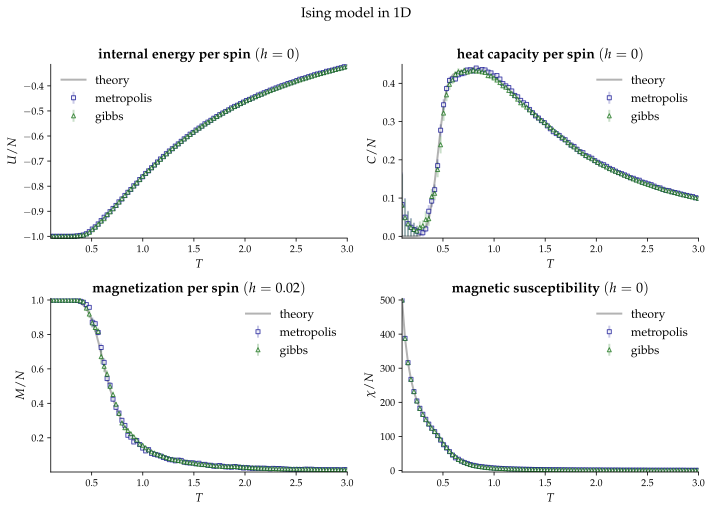

In [4]:
# set up plots for comparing theory and simulation

from ipywidgets import interactive

alpha = 0.3
lw = 2
color = "black"
label = "theory"
names = ["energy", "heat capacity", "magnetization", "magnetic susceptibility"]

analytical = {names[0]: energy, names[1]: heat_capacity, names[2]: magnetization, names[3]: susceptibility}

title = {names[0]: "internal energy per spin $(h=0)$", names[1]: "heat capacity per spin $(h=0)$",
          names[2]: "magnetization per spin $(h=0.02)$", names[3]: "magnetic susceptibility  $(h=0)$"}

ylabel = {names[0]: "$U/N$", names[1]: "$C/N$", names[2]: "$M/N$", names[3]: "$\chi/N$"}

metro_files = { names[0]: "energy", names[1]: "heat_capacity", names[2]: "magnetization", names[3]: "susceptibility" }
gibbs_files = { names[0]: "energy_gibbs", names[1]: "heat_capacity_gibbs", names[2]: "magnetization_gibbs",
          names[3]: "susceptibility_gibbs" }

def theory_and_simulation(theory=True, metropolis=True, gibbs=True):
    fig, ax = plt.subplots(2, 2, figsize=(10, 7))
    fig.suptitle("Ising model in 1D", y=1.01)
    for axis, name in zip(ax.reshape(4), names):
        set_labels(axis, title[name], "$T$", ylabel[name])
        if theory:
            axis.plot(T, analytical[name], lw=lw, c=color, alpha=alpha, label="theory")
        if metropolis:
            estimation_plot(axis, results_directory + metro_files[name] + ".dat", color='darkblue', fmt='s', mfc='w', label="metropolis")
        if gibbs:
            estimation_plot(axis, results_directory + gibbs_files[name] + ".dat", color='darkgreen', fmt='^', mfc='w', label="gibbs")
        if theory or metropolis or gibbs:
            axis.legend();
            
#interactive(theory_and_simulation) #  <-  uncomment for selecting interactively what to plot
theory_and_simulation()